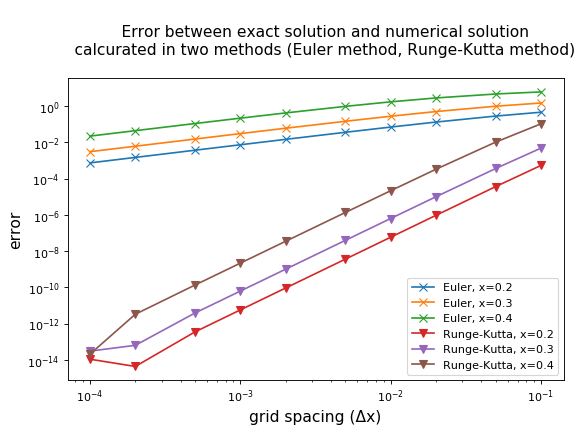

In [7]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

x0 = 0
y0 = 2
dx_list = [0.0001, 0.0002, 0.0005, 0.001, 0.002, 0.005, 0.01, 0.02, 0.05, 0.1]

def f(x, y):
    return (1+y**2)/(1+x**2)

def exact_solution(x):
    return (x + 2)/(1 - 2*x)

def euler(dx, xn, yn):
    return yn + dx*f(xn, yn)

def runge(dx, xn, yn):
    k1 = f(xn, yn)
    k2 = f(xn + dx/2, yn + dx*k1/2)
    k3 = f(xn + dx/2, yn + dx*k2/2)
    k4 = f(xn + dx, yn + dx*k3)
    return yn + dx*(k1 + 2*k2 + 2*k3 + k4)/6

def calc(method, dx, x0, y0):
    errs = []
    xn = x0
    yn = y0
    n = 0
    save_err_index = calc_save_err_index(dx)
    while x0 + dx*n < 0.5:
        if n in save_err_index:
            err = abs(yn - exact_solution(xn))
            errs.append(err)
        n +=1
        yn = method(dx, xn, yn)
        xn = x0 + dx*n
    return errs

def calc_save_err_index(dx):
    return [round(0.2/dx), round(0.3/dx), round(0.4/dx)]

def plot(err_data):
    euler_err = err_data[err_data["method"]=="euler"]
    runge_err = err_data[err_data["method"]=="runge"]
    plt.figure(num=None, figsize=(8, 5), dpi=80, facecolor='w', edgecolor='k')
    ms = 8
    fs = 14
    d = euler_err
    plt.plot(d["dx"], d["0.2"], marker='x', label="Euler, x=0.2", ms=ms)
    plt.plot(d["dx"], d["0.3"], marker='x', label="Euler, x=0.3", ms=ms)
    plt.plot(d["dx"], d["0.4"], marker='x', label="Euler, x=0.4", ms=ms)
    d = runge_err
    plt.plot(d["dx"], d["0.2"], marker='v', label="Runge-Kutta, x=0.2", ms=ms)
    plt.plot(d["dx"], d["0.3"], marker='v', label="Runge-Kutta, x=0.3", ms=ms)
    plt.plot(d["dx"], d["0.4"], marker='v', label="Runge-Kutta, x=0.4", ms=ms)
    plt.xscale("log")
    plt.yscale("log")
    plt.xlabel("grid spacing (Δx)", fontsize=fs)
    plt.ylabel("error", fontsize=fs)
    plt.title("""
    Error between exact solution and numerical solution
    calcurated in two methods (Euler method, Runge-Kutta method)
    """, fontsize=fs)
    plt.legend()
    plt.show()
    
def main():
    err_data = pd.DataFrame(columns=["method", "dx", "0.2", "0.3", "0.4"])
    for dx in dx_list:
        data = ["euler", dx]
        data = data + calc(euler, dx, x0, y0)
        err_data = err_data.append(pd.Series(data, index=err_data.columns),
                                   ignore_index=True)
    for dx in dx_list:
        data = ["runge", dx]
        data = data + calc(runge, dx, x0, y0)
        err_data = err_data.append(pd.Series(data, index=err_data.columns),
                                   ignore_index=True)
    plot(err_data)

if __name__ == "__main__":
    main()